In [5]:
msg = 'Hello world!'
print(msg)

Hello world!


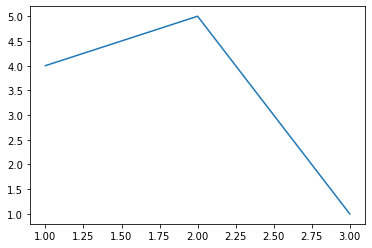

In [6]:
from matplotlib import pyplot as plt 
plt.plot([1,2,3],[4,5,1])
plt.show()

This doesn't have axis labels or a title, so we can add these.

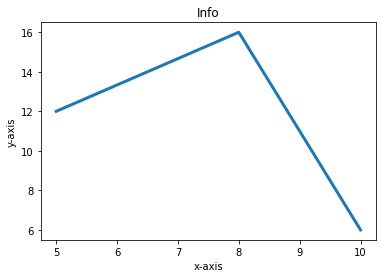

In [8]:
x = [5,8,10]
y = [12,16,6]

plt.plot(x, y, linewidth = 3)
plt.title('Info')
plt.ylabel('y-axis')
plt.xlabel('x-axis')
#now show the plot
plt.show()

It is also possible to use styles.

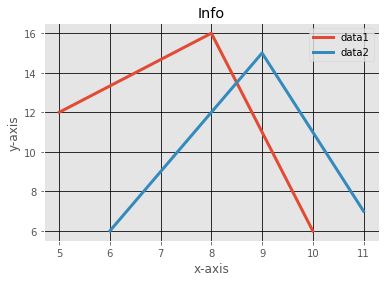

In [11]:
from matplotlib import style 
style.use('ggplot')
x2 = [6,9,11]
y2 = [6,15,7]
plt.plot(x, y, label = 'data1', linewidth = 3)
plt.plot(x2, y2, label = 'data2', linewidth = 3)
plt.title('Info')
plt.ylabel('y-axis')
plt.xlabel('x-axis')
#or change the grid color
plt.grid(True, color = 'K')
#or add a legend
plt.legend()
plt.show()



Lets work with some other data now to make more complext plots.

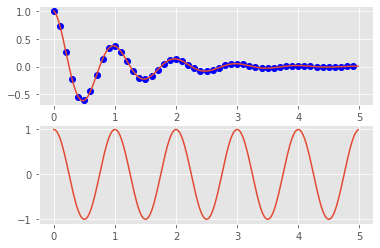

In [16]:
import numpy as np 
#define a function to transform some data
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

#now generate the base data
t1 = np.arange(0,5,0.1)
t2 = np.arange(0,5,0.02)

#now make the plots
plt.subplot(211) #the number seems to be '2' = two graphs, '1' = horizontally there will be 1 graph, and '1' = the graph number
plt.plot(t1, f(t1), 'bo', t2, f(t2)) #bo seems to change it to points, and you keep writing to overlay the next data
plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2))
plt.show()

Now I want to try importing some data and processing it to get a more complex plot result.

In [30]:
baseDir = 'C:/Users/chris/OneDrive/Documents/bccrc/shell-scripting/learningJupyter'
print(baseDir)
#now combine with our filename
targetFile = baseDir + '/testData.txt'
print(targetFile)
#ok, now we can read the file
testData = np.genfromtxt(targetFile, delimiter = '\t', dtype = None, names = True) #dtype being none here makes it guess the data type, names being true grabs the header

#actually this might be better to import as a pandas dataframe
import pandas as pd 
testData = pd.read_csv(targetFile, sep = '\t')
print(testData)

C:/Users/chris/OneDrive/Documents/bccrc/shell-scripting/learningJupyter
C:/Users/chris/OneDrive/Documents/bccrc/shell-scripting/learningJupyter/testData.txt
       Index          Tissue Dataset_ID   Sample_ID Origin Cellline_name  \
0          1  Adipose-Cancer    GSE2109   GSM137902      T          None   
1          2  Adipose-Cancer   GSE66162  GSM1615580      T          None   
2          3  Adipose-Cancer   GSE66162  GSM1615582      T          None   
3          4  Adipose-Cancer   GSE66162  GSM1615585      T          None   
4          5  Adipose-Cancer   GSE66162  GSM1615587      T          None   
...      ...             ...        ...         ...    ...           ...   
41288  44853    Vulva-Normal    GSE5563   GSM129255      T          None   
41289  44854    Vulva-Normal    GSE7307   GSM176078      T          None   
41290  44855    Vulva-Normal    GSE7307   GSM176079      T          None   
41291  44856    Vulva-Normal    GSE7307   GSM176080      T          None   
41292  

Ok, that seemed to work ok. Now we need to make some basic modifications to the data before we plot.

In [34]:
#split the tissue column to make two new columns
testData['tissueOrigin'] = testData['Tissue'].str.split('-').str[0]
testData['diseaseType'] = testData['Tissue'].str.split('-').str[1]
print(testData)

Index          Tissue Dataset_ID   Sample_ID Origin Cellline_name  \
0          1  Adipose-Cancer    GSE2109   GSM137902      T          None   
1          2  Adipose-Cancer   GSE66162  GSM1615580      T          None   
2          3  Adipose-Cancer   GSE66162  GSM1615582      T          None   
3          4  Adipose-Cancer   GSE66162  GSM1615585      T          None   
4          5  Adipose-Cancer   GSE66162  GSM1615587      T          None   
...      ...             ...        ...         ...    ...           ...   
41288  44853    Vulva-Normal    GSE5563   GSM129255      T          None   
41289  44854    Vulva-Normal    GSE7307   GSM176078      T          None   
41290  44855    Vulva-Normal    GSE7307   GSM176079      T          None   
41291  44856    Vulva-Normal    GSE7307   GSM176080      T          None   
41292  44857    Vulva-Normal    GSE7307   GSM176081      T          None   

       Expression_level tissueOrigin diseaseType  
0             10.689124      Adipose      C

Ok, now we are ready for our first plot of these data.

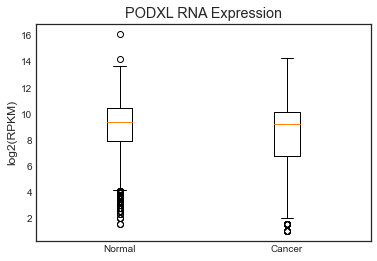

In [205]:
#make a boxplot first, separated by disease type
from matplotlib import pyplot as plt
style.use('seaborn-white')
#look how much of each data there is, just for verification
testData.groupby('diseaseType').count()
#get the two data sets
boxplotData = [testData[testData.diseaseType == 'Normal']['Expression_level'], testData[testData.diseaseType == 'Cancer']['Expression_level']]
#make the plot
plt.boxplot(boxplotData)
plt.title('PODXL RNA Expression')
plt.ylabel('log2(RPKM)')
xtickLocations = np.arange(1,3,1)
plt.xticks(xtickLocations, ('Normal','Cancer'))
plt.savefig(baseDir + '/boxplot_podxlExpression_normalTumour.pdf')
plt.show()

There is a potentially better way of making plots in general using the object oriented notation for matplotlib.

Text(0.65, 0.065, '35806')

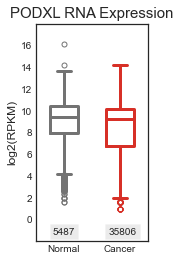

In [217]:
#create a specific size plot object
labels = ['Normal','Cancer']
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (2, 4))
bplot1 = ax1.boxplot(boxplotData, vert = True, labels = labels, widths = (0.5,0.5))
ax1.set_title('PODXL RNA Expression', fontsize = 15)
ax1.set_ylabel('log2(RPKM)', fontsize = 12)
ax1.set_yticks(np.arange(0,18,2))
ax1.set_ylim(-2,18)
#set colors for the outlines and median
colors = ['#737373', '#d73027']
for item in ['boxes', 'medians']:
    for i in range(len(boxplotData)):
        box = bplot1[item][i]
        box.set(color = colors[i], linewidth = 3)
#set for outliers
for item in ['fliers']:
    for i in range(len(boxplotData)):
        box = bplot1[item][i]
        box.set(markersize = 5, markeredgecolor = colors[i])
#set colors for the whiskers and caps
colors = ['#737373', '#737373', '#d73027', '#d73027']
for item in ['whiskers','caps']:
    boxSet = bplot1[item]
    for i in range(len(boxSet)):
        box = bplot1[item][i]
        box.set(color = colors[i], linewidth = 3)
#add a legend for n-values
props = dict(boxstyle = 'square', facecolor = '#d9d9d9', alpha = 0.5)
ax1.text(0.15, 0.065, np.str(testData.groupby('diseaseType').count()['Index'][1]), transform = ax1.transAxes, fontsize = 10, verticalalignment = 'top', bbox = props)
ax1.text(0.65, 0.065, np.str(testData.groupby('diseaseType').count()['Index'][0]), transform = ax1.transAxes, fontsize = 10, verticalalignment = 'top', bbox = props)